Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** and then **run all cells**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [9]:
NAME = "Quanpu Xiao"
STUDENT_ID = "14368978"

In this exercise, we will use your newly discovered classification skills to classify whether a couple is likely to have a successful relationship based on their astrological signs.
In this fictional data set, astrological signs do affect compatibility in some ways which you will have to discover. The effects of astrological signs which we have generated for this exercise may differ from real life, in that there are any.

Classification is supervised learning, which means that we already know the outcome for some data, and use this data to train a model to classify unknown data.
So, in our capacity as spiritual match-makers, we have compiled a list of relationships to train our classifier with.

In [10]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

We have two .csv files with data: couples.csv, and persons.csv.
Couples.csv contains the outcome we'd like to predict, but no useful variables to base our prediction on. It only tells us the id of the two partners.
It's best if we have both X and Y in a single dataframe before we proceed.
Create a dataframe called 'data' with the columns: couple_id, person_a, person_b, outcome, sign_a, sign_b, with the respective signs of persons a and b for each couple.

In [11]:
#YOUR CODE HERE
couples_df = pd.read_csv("couples.csv")
persons_df = pd.read_csv("persons.csv")

# Merge the couples_df with persons_df twice to get the signs for person_a and person_b
data_a = couples_df.merge(persons_df, left_on='person_a', right_on='id').rename(columns={'sign': 'sign_a'})
data_b = couples_df.merge(persons_df, left_on='person_b', right_on='id').rename(columns={'sign': 'sign_b'})

# Extracting the relevant columns from both merges
data = pd.DataFrame({
    'couple_id': couples_df['id'],
    'person_a': data_a['person_a'],
    'person_b': data_a['person_b'],
    'outcome': data_a['outcome'],
    'sign_a': data_a['sign_a'],
    'sign_b': data_b['sign_b']
})

print(data.head())

   couple_id  person_a  person_b    outcome  sign_a       sign_b
0          0         0         1  broken up  cancer      scorpio
1          1         2         3  broken up  taurus  sagittarius
2          2         4         5  broken up   virgo        virgo
3          3         6         7  broken up     leo          leo
4          4         8         9   divorced  pisces       gemini


Let's now have a look at the possible outcome variables.

<AxesSubplot:xlabel='outcome', ylabel='count'>

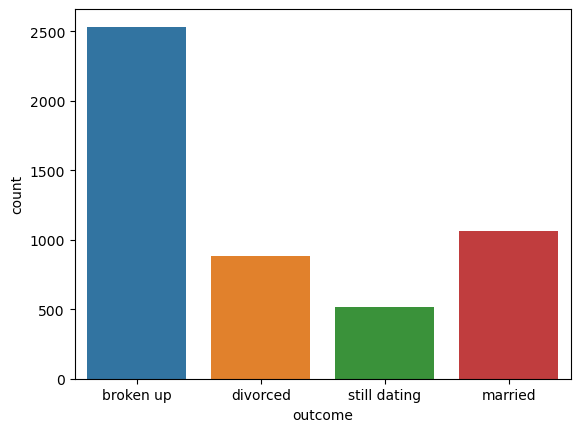

In [12]:
# Let's plot the outcomes
couples = pd.read_csv('couples.csv')
sns.countplot(data=couples, x='outcome')

As we can see, one possible outcome for couples is marriage. Although we can train a classifier to classify multiple outcome labels, let's keep it simple for now: We will simply classify whether a couple will be married or not. For this purpose, let's create a one-hot encoding: Create a column for data called 'married' which is equal to 1 if the couple is married and 0 otherwise.

In [13]:
#YOUR CODE HERE
data['married'] = (data['outcome'] == 'married').astype(int)
print(data.head())

   couple_id  person_a  person_b    outcome  sign_a       sign_b  married
0          0         0         1  broken up  cancer      scorpio        0
1          1         2         3  broken up  taurus  sagittarius        0
2          2         4         5  broken up   virgo        virgo        0
3          3         6         7  broken up     leo          leo        0
4          4         8         9   divorced  pisces       gemini        0


Now we need to do the same to X: our input features. Since we have two categorical variables (sign_a and sign_b) with 12 possible values each, let's use sklearn's OneHotEncoder class to create vectors instead of manually creating 24 columns. Create a numpy array called 'features' of shape (5000, 24) which contains our one-hot encoded feature vectors.
You can follow the first example of the class' documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [16]:
#YOUR CODE HERE

signs = data[['sign_a', 'sign_b']]

# OneHotEncoder
encoder = OneHotEncoder(sparse=False)

features = encoder.fit_transform(signs)
features_shape = features.shape
features_shape

(5000, 24)

Now we have everything we need: One-hot encoded features and the binary label 'married'.
During the lecture you learned about binary logistic regression. Since our output variable is either 0 or 1, this seems like an ideal use case for it!
Above, we imported LogisticRegression from sklearn. Have a look at the documentation, and implement it with default parameters for our data:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
Don't worry about test and train sets yet; we'll train our model on all the data and then evaluate it on the same data.

In [17]:
X = features
y = data['married']

#YOUR CODE HERE

classifier = LogisticRegression()
classifier.fit(X, y)

classifier.score(X, y)


0.7868

78% accuracy! That doesn't sound bad for a first attempt. But remember the zero-rate classifier? Let's have a look at what our baseline should be.
Above, we plotted all possible outcome variables. Have a look what's more likely: married (1), or not married (0)? Then create a zero-rate classifier that always returns the most likely result.
The estimated outcome value y is often denoted as ŷ, which is why we call it y_hat here.

In [18]:
def zero_rate(x) -> int:
    """
    Takes the input vector x and then completely disregards it.

    Returns:
        y(int): Whether or not the couple is married.
    """

    #YOUR CODE HERE
    return y.mode()[0]

y_hat = [zero_rate(x) for x in features]
# We imported accuracy_score from sklearn.metrics
acc = accuracy_score(y, y_hat)
print(acc)

0.7868


Oh no, our zero-rate classifier is just as accurate as our logistic regression classifier.
It seems our standard logistic regression model could not predict marriage based on astrological signs with any accuracy higher than chance.
Does that mean that the signs simply have to effect on courting outcome? That would perhaps be the conclusion if this was astronomy class, but we wouldn't give you such a boring dataset for classification class would we?
Assume there is some way in which the signs of the two partners affect their relationship. How come our model did not pick up on those?
Can you think of a way in which the features could be re-coded so that logistic regression would predict the outcome with higher accuracy?
Hint: A possible solution is shown in the next code cell. Try to think of one yourself first, but if you cannot, figure out why the sample solution works and then explain it here.

# Question 1: Why did logistic regression not achieve useful accuracy?

YOUR ANSWER HERE
If the relationship between astrological signs and marriage outcomes is not linear, logistic regression will struggle to model it effectively. 

In [20]:
# Create sign pairs for each possible combination
sign_combination = data['sign_a'] + '-' + data['sign_b']
# Shape them into an array with n samples and a single feature
sign_combination = np.asarray(sign_combination).reshape(-1, 1)
# One-hot encode
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(sign_combination)
features = enc.transform(sign_combination).toarray()
# Train and evaluate our classifier on these new features
X = features
y = data['married']
classifier = LogisticRegression(random_state=0).fit(X, y)
classifier.score(X, y)

0.811

This seems to have marginally improved the accuracy of our model. Let's see if we can improve it further by building more complex models and taking more information into account.